# ARIMA

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# mengganti tema plot menjadi dark
import os
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

## 2. Data

In [2]:
data = pd.read_csv('udang.csv', index_col='Produksi Hasil Tangkap Laut', parse_dates=True)
data.index.freq = 'MS'
data

,Udang
Produksi Hasil Tangkap Laut,
2017-01-01,1.12
2017-02-01,1.18
2017-03-01,1.32
2017-04-01,1.29
2017-05-01,1.21
2017-06-01,1.35
2017-07-01,1.48
2017-08-01,1.48
2017-09-01,1.36


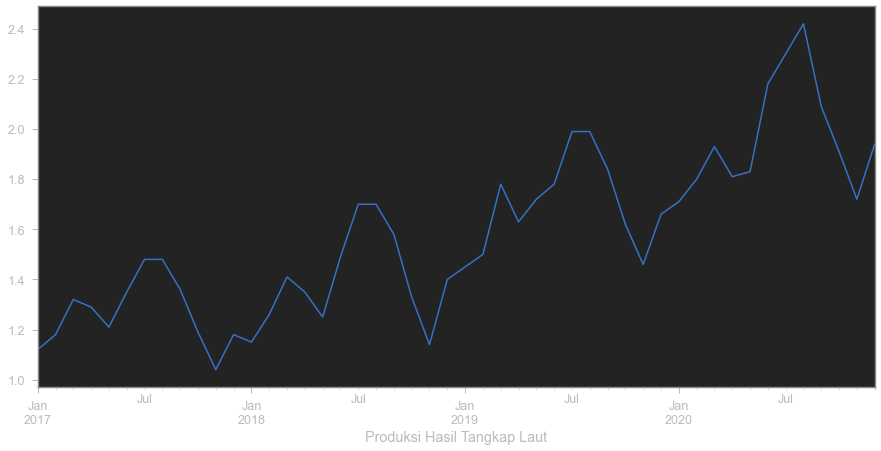

In [3]:
data['Udang'].plot(figsize=(15,7));

## 3. Check Stationarity Data

In [4]:
# augmented dickey-fuller test function
def adfuller_test(series):
    """
    Pass time series, returns ADF report
    """
    print("Augmented Dickey-Fuller Test:")
    result = adfuller(series.dropna())
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    output = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        output[f'critical value ({key})'] = val
    print(output.to_string())
    
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Accept the null hypothesis")
        print("Data has a unit root and is non-stationary")

# try in our data
adfuller_test(data['Udang'])

Augmented Dickey-Fuller Test:
ADF test statistic       1.080393
p-value                  0.995046
# lags used             10.000000
# observations          37.000000
critical value (1%)     -3.620918
critical value (5%)     -2.943539
critical value (10%)    -2.610400

Weak evidence against the null hypothesis
Accept the null hypothesis
Data has a unit root and is non-stationary


Data is NON-stationary

## 4. Differencing

In [5]:
data['Udang d1'] = diff(data['Udang'], k_diff=1)     #lag 1
# cek stationarity again
adfuller_test(data['Udang d1'])

Augmented Dickey-Fuller Test:
ADF test statistic     -6.586191e+00
p-value                 7.304679e-09
# lags used             1.000000e+01
# observations          3.600000e+01
critical value (1%)    -3.626652e+00
critical value (5%)    -2.945951e+00
critical value (10%)   -2.611671e+00

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Data is stationary!

## 5. Check Seasonality Data

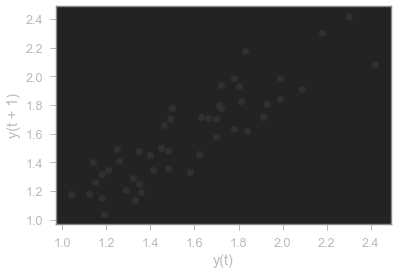

In [6]:
# With lag plot
lag_plot(data['Udang']);

terdapat trend, tetapi seasonality tidak diketahui

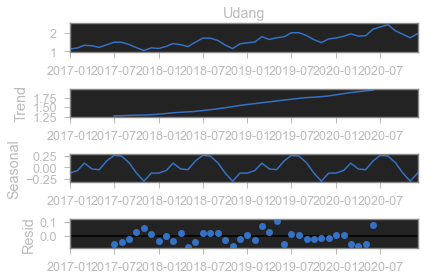

In [7]:
# With ETS (Error, Trend, Seasonality)
result = seasonal_decompose(data['Udang'].dropna(), model='add')  # model='add' for linear
result.plot();

ADA SEASONALITY. Gunakan SARIMA MODEL

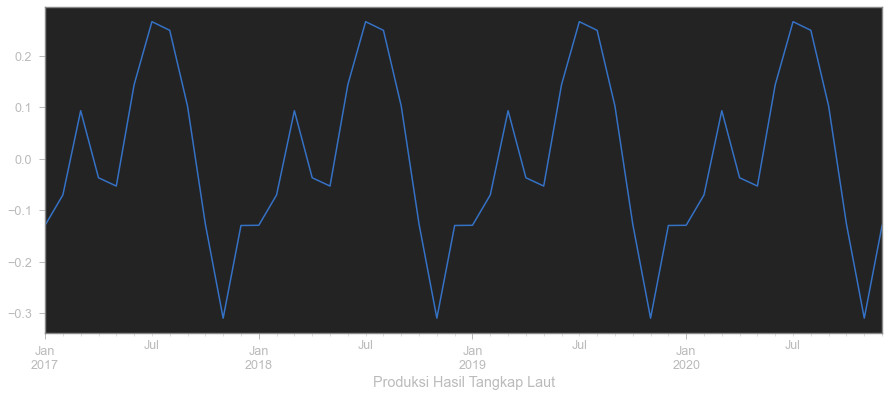

In [8]:
# lihat range seasonalitynya
result.seasonal.plot(figsize=(15,6));

sesoanality terjadi setiap tahun --> m=12

## 6. Find (p,d,q)(P,D,Q)SARIMA Model

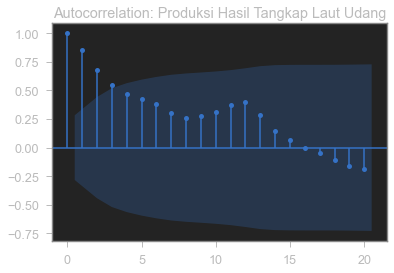

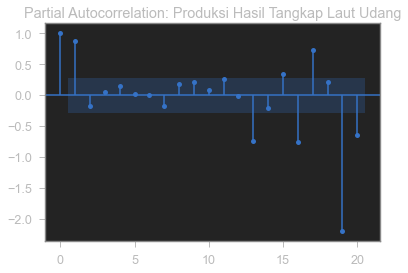

In [9]:
# Plot ACF
lags = 20
title = 'Autocorrelation: Produksi Hasil Tangkap Laut Udang'
plot_acf(data['Udang'],title=title,lags=lags);
# PLOT PACF
lags = 20
title = 'Partial Autocorrelation: Produksi Hasil Tangkap Laut Udang'
plot_pacf(data['Udang'],title=title,lags=lags);

In [10]:
# autoarima
auto_arima(data['Udang'], seasonal=True, stationary=False, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=-70.892, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-62.525, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-76.765, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-73.323, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-70.535, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-75.269, Time=0.60 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-75.273, Time=0.58 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-74.197, Time=0.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-73.267, Time=0.76 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-68.740, Time=0.12 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-75.000, Time=0.33 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-75.225, Time=0.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-75.657, Time=0.38 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=-72.765, Time=0.34 sec
 ARIMA(1,1,0)(1,1,0)[12] intercep

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

Gunakan model (1,1,0)(1,1,0,12)

## 7. Split Data

In [11]:
# Ingin memprediksi 6 bulan berikutnya
train_data = data['Udang'].iloc[:-6]
test_data = data['Udang'].iloc[-6:]

train_data, test_data

(Produksi Hasil Tangkap Laut
 2017-01-01    1.12
 2017-02-01    1.18
 2017-03-01    1.32
 2017-04-01    1.29
 2017-05-01    1.21
 2017-06-01    1.35
 2017-07-01    1.48
 2017-08-01    1.48
 2017-09-01    1.36
 2017-10-01    1.19
 2017-11-01    1.04
 2017-12-01    1.18
 2018-01-01    1.15
 2018-02-01    1.26
 2018-03-01    1.41
 2018-04-01    1.35
 2018-05-01    1.25
 2018-06-01    1.49
 2018-07-01    1.70
 2018-08-01    1.70
 2018-09-01    1.58
 2018-10-01    1.33
 2018-11-01    1.14
 2018-12-01    1.40
 2019-01-01    1.45
 2019-02-01    1.50
 2019-03-01    1.78
 2019-04-01    1.63
 2019-05-01    1.72
 2019-06-01    1.78
 2019-07-01    1.99
 2019-08-01    1.99
 2019-09-01    1.84
 2019-10-01    1.62
 2019-11-01    1.46
 2019-12-01    1.66
 2020-01-01    1.71
 2020-02-01    1.80
 2020-03-01    1.93
 2020-04-01    1.81
 2020-05-01    1.83
 2020-06-01    2.18
 Freq: MS, Name: Udang, dtype: float64,
 Produksi Hasil Tangkap Laut
 2020-07-01    2.30
 2020-08-01    2.42
 2020-09-01    2.09
 2

## 8. SARIMA Train Model

SARIMA(1,1,0)(1,1,0,12)

In [12]:
# model SARIMA in train data
model_train_SARIMA = SARIMAX(train_data, order=(1,1,0), seasonal_order=(1,1,0,12)).fit()
model_train_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Udang   No. Observations:                   42
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  33.876
Date:                            Sun, 12 Dec 2021   AIC                            -61.753
Time:                                    20:30:57   BIC                            -57.651
Sample:                                01-01-2017   HQIC                           -60.468
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3837      0.194     -1.974      0.048      -0.765      -0.003
ar.S.L12      -0.6089      0.270     -2.258      0.024      -1.137      -0.080
sigma2         0.0046      0.002      2.845      0.004       0.001       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 3.04
Prob(Q):                              0.76   Prob(JB):                         0.22
Heteroskedasticity (H):               2.14   Skew:                             0.79
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 9. Test Prediction

In [13]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

prediction_test = model_train_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,1,0,12) Prediction')
prediction_test

2020-07-01    2.320778
2020-08-01    2.347340
2020-09-01    2.205415
2020-10-01    1.971059
2020-11-01    1.791291
2020-12-01    2.028401
Freq: MS, Name: SARIMA(1,1,0)(1,1,0,12) Prediction, dtype: float64

Digunakan typ='levels' krn ingin melihat hasil prediksi dari data asli, bukan data yg sudah didifferencing

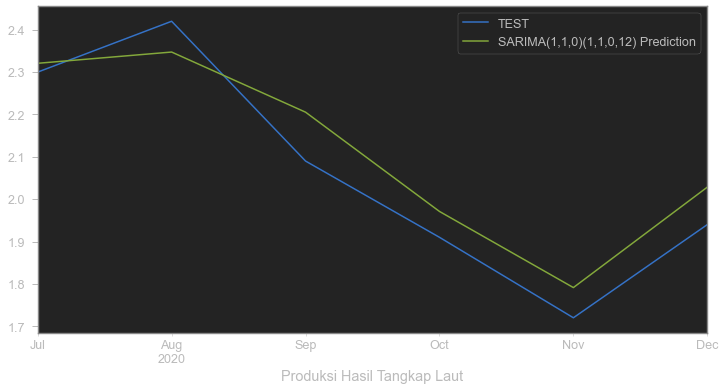

In [14]:
# PLOT
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

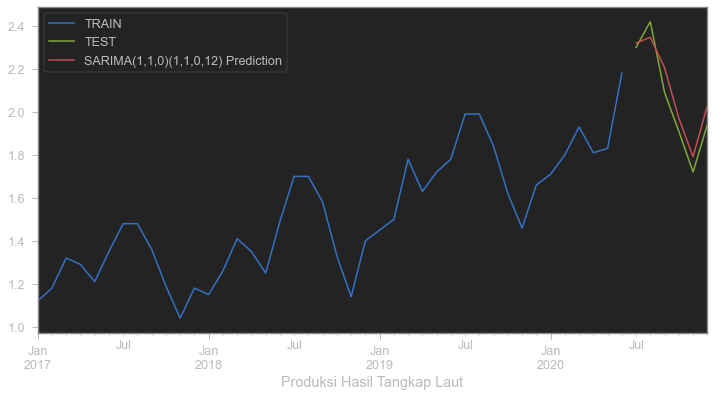

In [15]:
# PLOT
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

## 10. Evaluate Model

In [16]:
print('Mean Train data -->', train_data.mean())
print('Standard Deviation Train data -->', train_data.std())
print('\n')

error = rmse(test_data, prediction_test)
print(f'ARIMA(1,1,0) RMSE Error: {error:11.10}')
aic_values = model_train_SARIMA.aic
print(f'ARIMA(1,1,0) AIC: {aic_values:6.5}')
print('\n')

print('Mean Test data -->', test_data.mean())
print('Mean Prediction results -->', prediction_test.mean())

Mean Train data --> 1.5152380952380953
Standard Deviation Train data --> 0.2805590072732242


ARIMA(1,1,0) RMSE Error: 0.07708983237
ARIMA(1,1,0) AIC: -61.753


Mean Test data --> 2.063333333333333
Mean Prediction results --> 2.11071387270504


## 11. Re-Fit Model to Entire Dataset

In [17]:
model_SARIMA = SARIMAX(data['Udang'], order=(1,1,0), seasonal_order=(1,1,0,12)).fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Udang   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                  41.382
Date:                            Sun, 12 Dec 2021   AIC                            -76.765
Time:                                    20:30:58   BIC                            -72.099
Sample:                                01-01-2017   HQIC                           -75.154
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4927      0.174     -2.831      0.005      -0.834      -0.152
ar.S.L12      -0.5776      0.273     -2.119      0.034      -1.112      -0.043
sigma2         0.0047      0.001      3.515      0.000       0.002       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.07
Prob(Q):                              0.96   Prob(JB):                         0.35
Heteroskedasticity (H):               1.71   Skew:                             0.53
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 12. Forecasting The Future

In [18]:
# forecasting the next 6 months
start = len(data)
end = len(data)+5

forecast = model_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(1,1,0)(1,1,0,12) Forecast')
forecast

2021-01-01    1.997220
2021-02-01    2.060560
2021-03-01    2.278947
2021-04-01    2.140757
2021-05-01    2.201611
2021-06-01    2.383909
Freq: MS, Name: SARIMA(1,1,0)(1,1,0,12) Forecast, dtype: float64

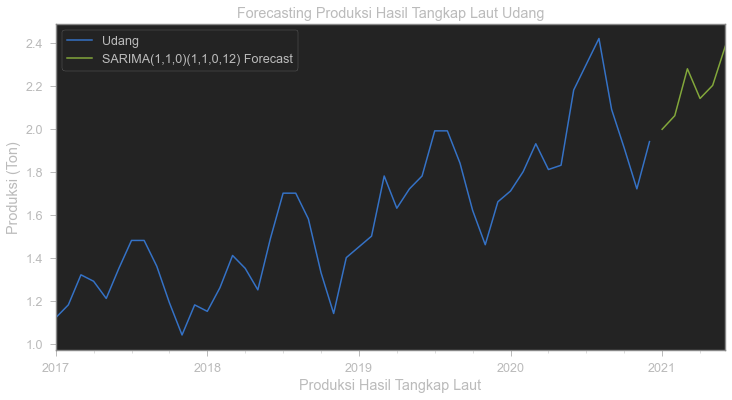

In [19]:
# PLOT
data['Udang'].plot(legend=True)
forecast.plot(figsize=(12,6), legend=True, title='Forecasting Produksi Hasil Tangkap Laut Udang', ylabel='Produksi (Ton)');

In [20]:
# save model
model_SARIMA.save('model_udang.pkl')